In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A%2BA/623/A108

In [51]:
index = 1
df = pd.read_csv(f"result/m{index}.csv")
df.head()

,Unnamed: 0,age,feh,av,dist,mass
0,0,9.439442,0.226028,0.026413,1192.238082,1.475296
1,1,9.439405,0.259196,0.043843,1144.434478,1.464205
2,2,9.324980,0.352825,0.116045,1210.922278,1.555902
3,3,9.396337,0.159923,0.025413,1297.231858,1.561334
4,4,9.436302,0.222283,0.053814,1172.756690,1.470618


In [52]:
df.shape

(250000, 6)

<AxesSubplot:xlabel='dist', ylabel='Count'>

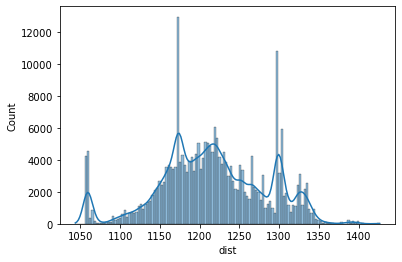

In [53]:
sns.histplot(x="dist", data=df, kde=True)

In [2]:
from scipy import stats
values = df['age']
kernel = stats.gaussian_kde(values)


NameError: name 'df' is not defined

In [20]:
df1 = pd.read_csv(f"result/1/m1.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
df2 = pd.read_csv(f"result/2/m1.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)

In [19]:
df1.head()

,age,feh,av,dist,mass
0,9.316431,-0.236155,0.225488,1382.375788,1.532977
1,9.454697,0.156956,0.035938,1279.485604,1.518713
2,9.518180,0.224113,0.046100,1108.316173,1.474038
3,9.520638,0.417587,0.026954,1143.718146,1.510718
4,9.451399,0.106784,0.053603,1160.487683,1.500881


In [21]:
df2.head()

,age,feh,av,dist,mass
0,9.439258,0.231752,0.062401,1133.566685,1.453225
1,9.271753,0.123831,0.352314,1190.077108,1.540195
2,9.302516,0.235222,0.186591,1279.976314,1.581588
3,9.338919,0.172602,0.233726,1173.853676,1.507745
4,9.417360,0.288009,0.040868,1175.781170,1.491046


In [23]:
DF = pd.concat([df1, df2])
DF.reset_index(drop=True, inplace=True)
DF

,age,feh,av,dist,mass
0,9.316431,-0.236155,0.225488,1382.375788,1.532977
1,9.454697,0.156956,0.035938,1279.485604,1.518713
2,9.518180,0.224113,0.046100,1108.316173,1.474038
3,9.520638,0.417587,0.026954,1143.718146,1.510718
4,9.451399,0.106784,0.053603,1160.487683,1.500881
...,...,...,...,...,...
499995,9.036338,0.074678,0.752165,1303.242513,1.748966
499996,9.422505,0.280240,0.030592,1176.843318,1.486519
499997,9.222781,0.220370,0.338608,1176.063935,1.573051
499998,9.150322,0.062862,0.568795,1155.718676,1.581468


<AxesSubplot:>

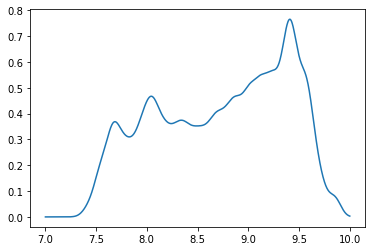

In [101]:
ages = np.linspace(7,10, 1000)
prob = kernel.pdf(ages)

sns.lineplot(x=ages, y=prob)

In [28]:
cek = []
if(len(cek) == 0):
  print("hello")

hello


In [6]:
# Age
Number = 2000
ages = np.linspace(8,10, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['age'])
  prob *= kernel.pdf(ages)
  print(i, end=" ")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,age,feh,av,dist,mass
0,9.457622,0.134074,0.297053,1265.606359,0.969573
1,9.539717,0.157271,0.374564,1362.496580,1.003789
2,9.595168,-0.372720,0.083764,1198.308781,0.823781
3,9.222852,0.022121,0.454059,1294.862926,0.989741
4,9.305552,0.116845,0.614227,1552.688885,1.101114
...,...,...,...,...,...
999995,7.646349,-0.271190,0.890052,1464.844415,1.088926
999996,9.852828,-0.025832,0.383026,1343.481509,0.917835
999997,7.624803,-0.085763,0.521138,1276.459880,1.004803
999998,8.209416,-0.024457,0.778701,1536.839931,1.133915


(9.25, 9.6)

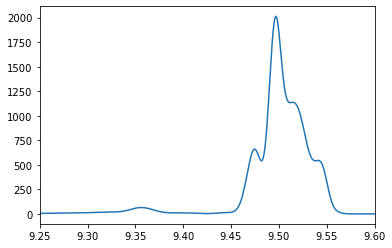

In [7]:
plt.plot(ages, prob)
plt.xlim(9.25, 9.6)

In [8]:
df_x = pd.DataFrame(dict(age=ages, prob=prob))
df_x.to_csv(f'mass/age.csv')

In [9]:
# FeH
Number = 2000
x = np.linspace(-3,1, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['feh'])
  prob *= kernel.pdf(x)
  print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

(0.0, 0.3)

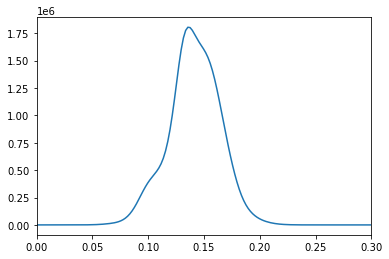

In [11]:
plt.plot(x, prob)
plt.xlim(0, 0.3)

In [12]:
df_x = pd.DataFrame(dict(feh=x, prob=prob))
df_x.to_csv(f'mass/feh.csv')

In [22]:
# AV
Number = 2000
x = np.linspace(0,1, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['av'])
  prob *= kernel.pdf(x)
  print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

(0.0, 0.3)

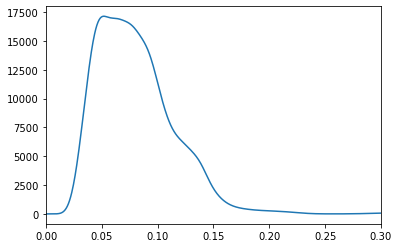

In [24]:
plt.plot(x, prob)
plt.xlim(0, 0.3)

In [25]:
df_x = pd.DataFrame(dict(feh=x, prob=prob))
df_x.to_csv(f'mass/AV.csv')

In [26]:
# Dist
Number = 2000
x = np.linspace(700,2000, Number)
prob = np.ones(Number)

for i in range(1, 21):
  df_com = []
  for j in range(1,5):
    df = pd.read_csv(f"result/{j}/m{i}.csv", names=["age", "feh", "av", "dist", "mass"], skiprows=1)
    if(len(df_com) == 0):
      df_com = df
    else:
      df_com = pd.concat([df_com, df])
      df_com.reset_index(drop=True, inplace=True)
  kernel = stats.gaussian_kde(df_com['dist'])
  prob *= kernel.pdf(x)
  print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

(1180.0, 1300.0)

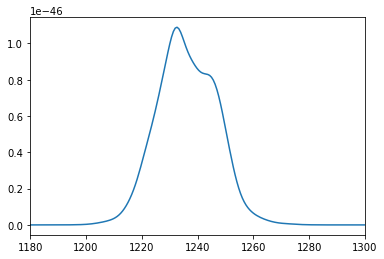

In [33]:
plt.plot(x, prob)
plt.xlim(1180, 1300)

In [34]:
df_x = pd.DataFrame(dict(dist=x, prob=prob))
df_x.to_csv(f'mass/dist.csv')

<AxesSubplot:xlabel='mass', ylabel='Count'>

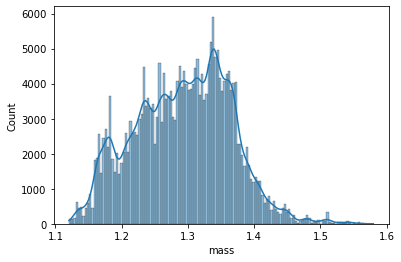

In [157]:
i = 10
df = pd.read_csv(f"result/m{i}.csv")
sns.histplot(x="mass", data=df, kde=True)

(0.0, 6.212131417201765)

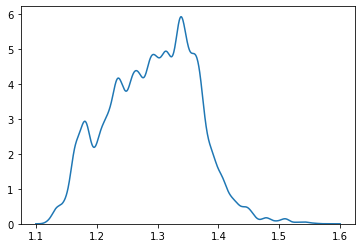

In [159]:
# mass
Number = 1000
x = np.linspace(1.1, 1.6, Number)
prob = np.ones(Number)
kernel = stats.gaussian_kde(df['mass'])
prob *= kernel.pdf(x)  
plt.plot(x, prob)
# plt.xlim(1190, 1290)
plt.ylim(0)

In [160]:
df_x = pd.DataFrame(dict(mass=x, prob=prob))
df_x.to_csv(f'mass/m{i}.csv')

(0.0, 6.121515890831442e-47)

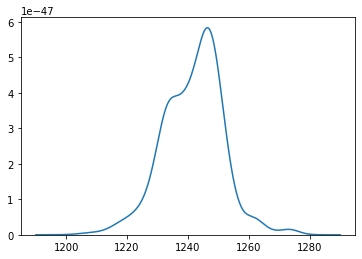

In [93]:
mask = (x > 1190)*(x<1290)
prob_x = prob[mask]
xx = x[mask]

plt.plot(xx, prob_x)
plt.ylim(0)

In [83]:
len(xx)

390

In [98]:
df_x = pd.DataFrame(dict(mass=xx, prob=prob_x))
df_x.to_csv(f'mass/m{i}.csv')

In [35]:
def mean(x, prob):
  denominator = np.sum(prob)
  nominator = np.sum(prob*x)
  return nominator/denominator

In [48]:
from scipy.signal import find_peaks

df_age = pd.read_csv("mass/4/age.csv")
# df_age = pd.read_csv("age_prob.csv")

# print(df_age.describe())
peaks, _ = find_peaks(df_age.prob, height=0)
# print(df_age.iloc[peaks])
age = df_age.age[df_age.prob == df_age.prob.max()]
age = age.values[0]
# age = df_age.iloc[peaks[2]].age
print("peak", age)
print("mean", mean(df_age.age, df_age.prob))
peaks

peak 9.545954595459548
mean 9.54290521966177


array([8324, 8601, 8645, 8724, 8864, 9008])

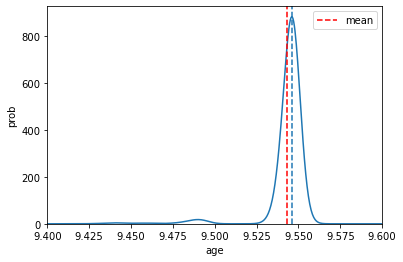

In [51]:
sns.lineplot(x="age", y="prob", data=df_age)
plt.ylim(0)
plt.xlim(9.4, 9.6)
plt.axvline(age, ls="--")
plt.axvline(mean(df_age.age, df_age.prob), ls="--", c='r', label="mean")
plt.legend()

In [52]:
df_feh = pd.read_csv("mass/4/feh.csv")
# df_feh = pd.read_csv("feh_prob.csv")

print(df_feh.describe())
peaks, _ = find_peaks(df_feh.prob, height=0)
print(df_feh.iloc[peaks])
feh = df_feh.feh[df_feh.prob == df_feh.prob.max()]
feh = feh.values[0]
print("mode", feh)
print("mean", mean(df_feh.feh, df_feh.prob))

        Unnamed: 0           feh           prob
count  10000.00000  1.000000e+04   10000.000000
mean    4999.50000 -1.000000e+00    2915.822924
std     2886.89568  1.154874e+00   22920.485575
min        0.00000 -3.000000e+00       0.000000
25%     2499.75000 -2.000000e+00       0.000000
50%     4999.50000 -1.000000e+00       0.000000
75%     7499.25000  2.749943e-16       0.000000
max     9999.00000  1.000000e+00  295382.330591
      Unnamed: 0       feh           prob
7434        7434 -0.026103       0.003625
7885        7885  0.154315  295382.330591
mode 0.1543154315431545
mean 0.15090734097198102


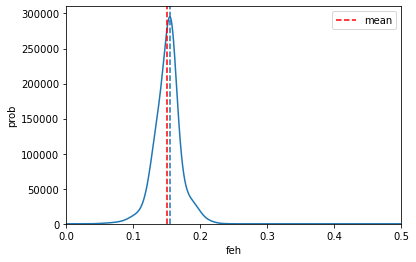

In [53]:
sns.lineplot(x="feh", y="prob", data=df_feh)
plt.ylim(0)
plt.xlim(0, 0.5)
plt.axvline(feh, ls="--")
plt.axvline(mean(df_feh.feh, df_feh.prob), ls="--", c='r', label="mean")
plt.legend()

In [54]:
df_av = pd.read_csv("mass/4/AV.csv", names=["index", "av", "prob"], skiprows=1)
# df_av = pd.read_csv("av_prob.csv", names=["index", "av", "prob"], skiprows=1)

print(df_av.describe())
peaks, _ = find_peaks(df_av.prob, height=0)
print(df_av.iloc[peaks])
av = df_av.av[df_av.prob == df_av.prob.max()]
av = av.values[0]
print("mode", av)
print("mean", mean(df_av.av, df_av.prob))

             index            av           prob
count  10000.00000  10000.000000   1.000000e+04
mean    4999.50000      0.500000   2.828715e+02
std     2886.89568      0.288718   7.816753e+02
min        0.00000      0.000000   0.000000e+00
25%     2499.75000      0.250000  5.048244e-125
50%     4999.50000      0.500000   5.460422e-12
75%     7499.25000      0.750000   6.193706e-04
max     9999.00000      1.000000   3.571944e+03
      index        av          prob
848     848  0.084808  3.571944e+03
1282   1282  0.128213  1.957489e+03
4831   4831  0.483148  1.472706e-07
5129   5129  0.512951  2.792293e-07
5336   5336  0.533653  3.904041e-07
mode 0.0848084808480848
mean 0.0923349638039461


(0.0, 0.3)

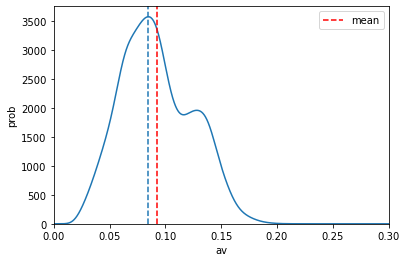

In [56]:
sns.lineplot(x="av", y="prob", data=df_av)
plt.axvline(av, ls="--")
plt.axvline(mean(df_av.av, df_av.prob), ls="--", c='r', label="mean")
plt.legend()
plt.ylim(0)
plt.xlim(0,0.3)

In [57]:
df_dist = pd.read_csv("mass/4/dist.csv", names=["index", "dist", "prob"], skiprows=1)
# df_dist = pd.read_csv("dist_prob.csv", names=["index", "dist", "prob"], skiprows=1)
df_dist.head()
print(df_dist.describe())
peaks, _ = find_peaks(df_dist.prob, height=0)
print(df_dist.iloc[peaks])
dist = df_dist.dist[df_dist.prob == df_dist.prob.max()]
dist = dist.values[0]
print("mode", dist)
print("mean", mean(df_dist.dist, df_dist.prob))

             index          dist           prob
count  10000.00000  10000.000000   1.000000e+04
mean    4999.50000   1350.000000   5.711579e-48
std     2886.89568    375.333972   3.702753e-47
min        0.00000    700.000000   0.000000e+00
25%     2499.75000   1025.000000   0.000000e+00
50%     4999.50000   1350.000000   0.000000e+00
75%     7499.25000   1675.000000  2.305184e-262
max     9999.00000   2000.000000   3.447630e-46
      index         dist          prob
4101   4101  1233.183318  3.447630e-46
4547   4547  1291.169117  3.057227e-51
mode 1233.183318331833
mean 1232.9016194538785


(1180.0, 1300.0)

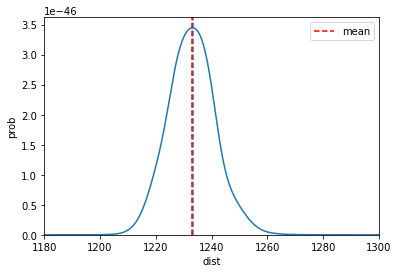

In [60]:
sns.lineplot(x="dist", y="prob", data=df_dist)
plt.axvline(dist, ls="--")
plt.axvline(mean(df_dist.dist, df_dist.prob), ls="--", c='r', label="mean")
plt.legend()
plt.ylim(0)
plt.xlim(1180, 1300)

In [61]:
result = pd.read_csv("FSR_0866.csv")
result['b-r'] = result["b"] - result["r"]
result.head()

,index,g,g_error,r,r_error,b,b_error,parallax,parallax_error,b-r
0,0,11.278003,0.000529,10.575042,0.000652,11.874046,0.002036,0.787126,0.040036,1.299005
1,1,12.160135,0.000232,11.803123,0.000792,12.372580,0.001880,0.798561,0.037741,0.569456
2,2,12.511895,0.000231,11.850567,0.000917,13.050261,0.002017,0.840251,0.039577,1.199694
3,3,12.679243,0.000360,12.401573,0.001443,12.834153,0.001855,0.851589,0.035360,0.432580
4,4,13.133636,0.000764,12.620711,0.001752,13.481897,0.002662,0.780182,0.023758,0.861186


In [45]:
from isochrones.mist import MIST_Isochrone
from isochrones import SingleStarModel, get_ichrone

mist = get_ichrone('mist')
Mist = MIST_Isochrone()

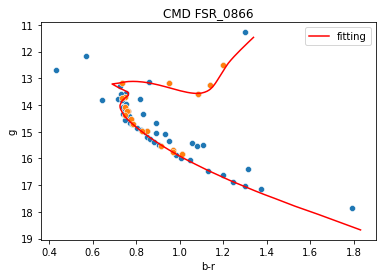

In [63]:
from numpy.random import default_rng

rng = default_rng()
numbers = [2,  11,  6,  7, 12, 13, 21, 23, 24, 27, 29, 34, 37, 38, 5, 50, 51, 53, 54, 52]
numbers.sort()
G = result['g']
B = result['b']
R = result['r']
prop = []

for i in numbers:
    props = {
        'G_mag': (result['g'][i], result['g_error'][i]),
        'RP_mag': (result['r'][i], result['r_error'][i]),
        'BP_mag': (result['b'][i], result['b_error'][i]),
        'parallax': (result['parallax'][i], result['parallax_error'][i]),
    }
    prop.append(props)
g = []
r = []
b = []
for p in prop:
    g.append(p['G_mag'][0])
    r.append(p['RP_mag'][0])
    b.append(p['BP_mag'][0])

g = np.array(g)
r = np.array(r)
b = np.array(b)

g_mod, r_mod, b_mod = np.array([]), np.array([]), np.array([])
pivot = 1.36
delta_pivot =0.08
MASSES = np.linspace(0.6, pivot, 50)
MASSES2 = np.linspace(pivot, pivot+delta_pivot, 100)
MASSES = np.concatenate((MASSES,MASSES2), axis=0)
for mass in MASSES:
    eep = mist.get_eep(mass, age, feh, accurate=True)
    pars = [eep, age, feh, dist, av]
    v = Mist.interp_mag(pars, ['G', 'RP', 'BP'])
    g_i, r_i, b_i = v[-1]
    g_mod = np.append(g_mod, g_i)
    r_mod = np.append(r_mod, r_i)
    b_mod = np.append(b_mod, b_i)
    
sns.scatterplot(x="b-r", y="g", data=result)
sns.scatterplot(x=b-r, y=g)
plt.plot(b_mod-r_mod, g_mod, label="fitting", c="r")
plt.title("CMD FSR_0866")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [64]:
print(10**age/1e9)

3.5152368757260057
